In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn import metrics
from sklearn.cluster import DBSCAN, KMeans

In [3]:
data = load_wine()

df = pd.DataFrame(data.data, columns=data.feature_names)
target = data.target

display(df, target)
display(df.shape)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

(178, 13)

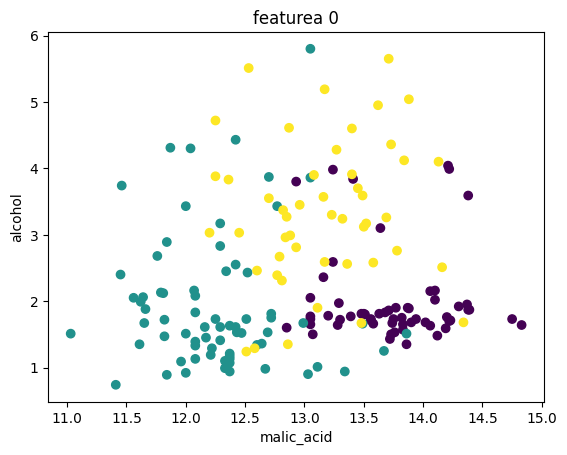

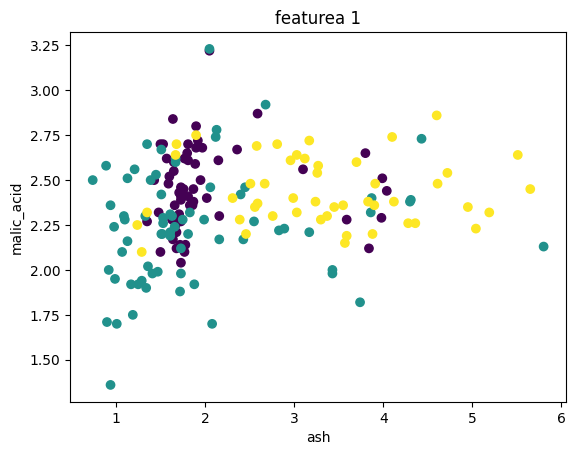

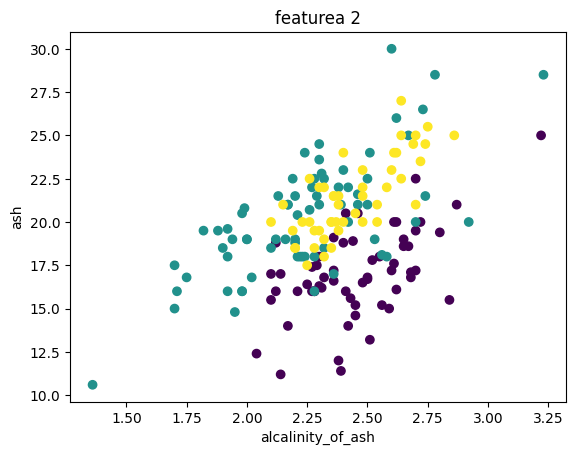

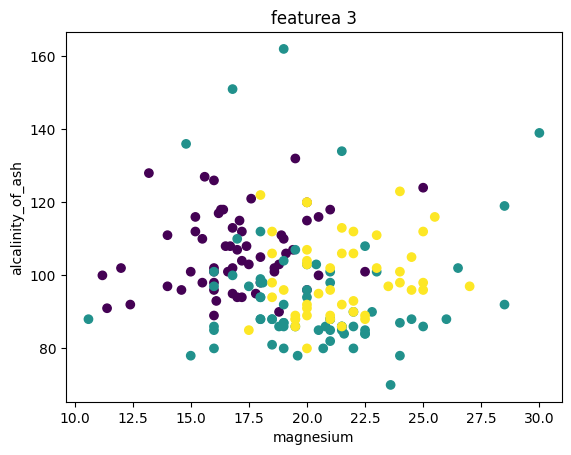

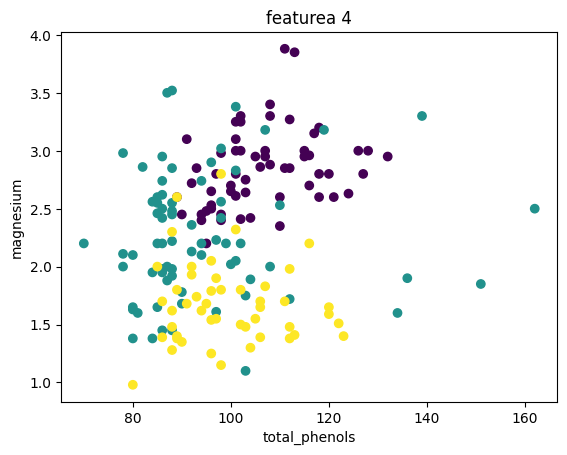

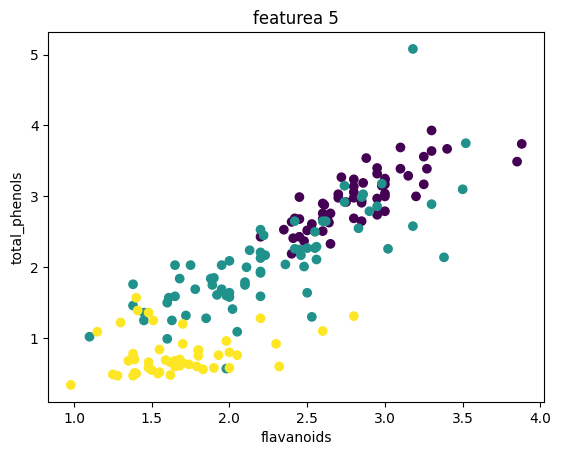

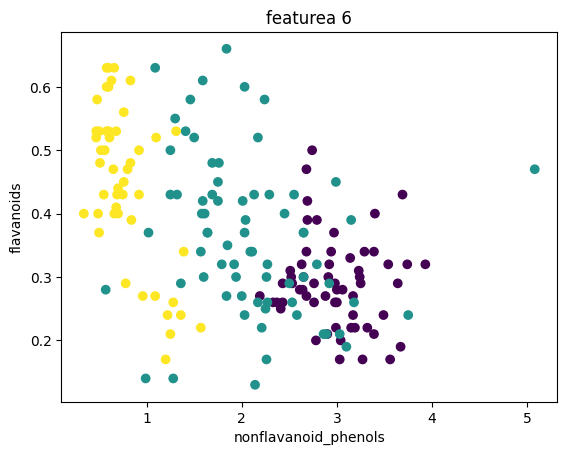

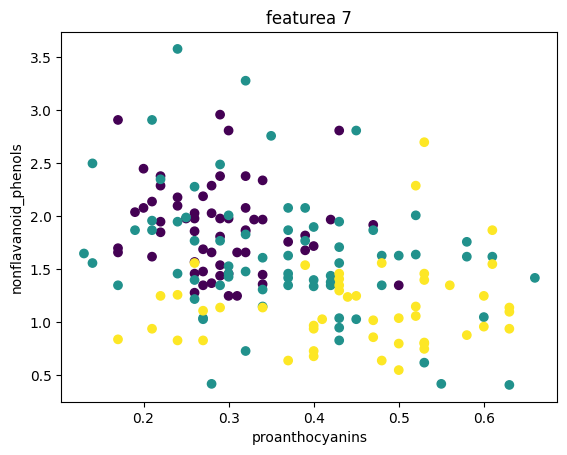

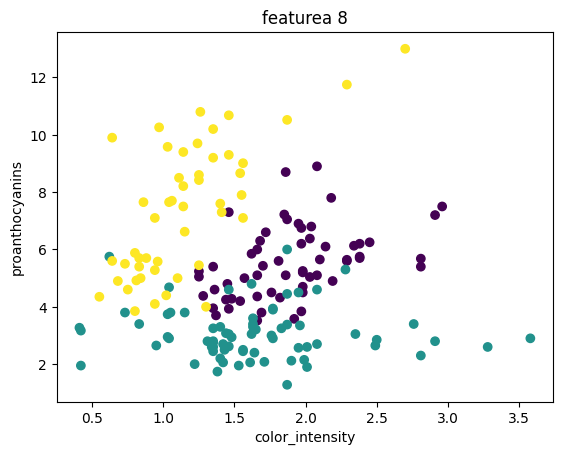

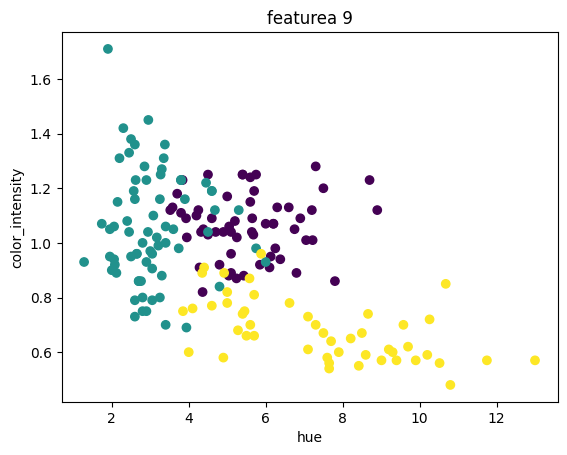

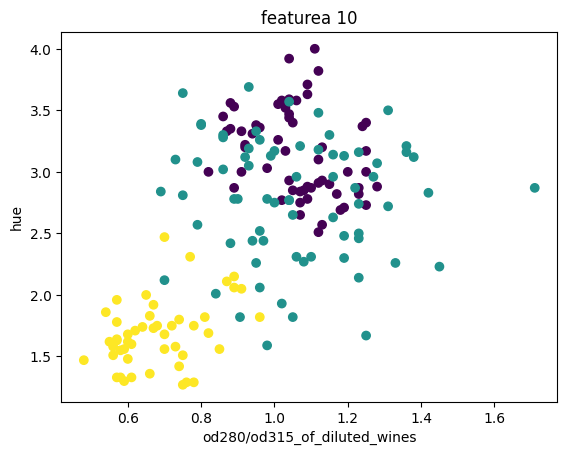

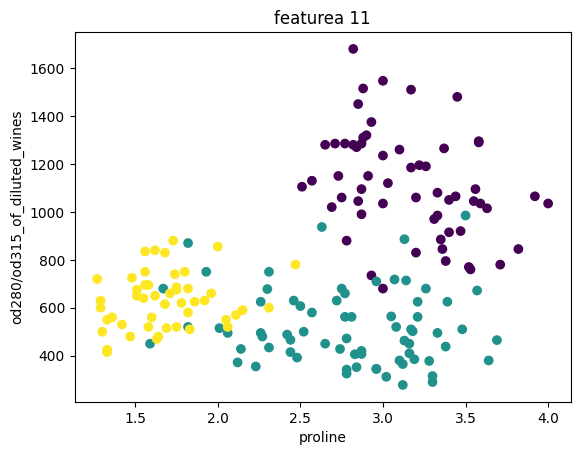

In [3]:
for i in range(df.shape[1] - 1):
    plt.scatter(df.iloc[::, i], df.iloc[::, i+1], c=target)
    plt.title(f'featurea {i}')
    plt.xlabel(data.feature_names[i+1])
    plt.ylabel(data.feature_names[i])
    plt.show()
    if i == 12:
        break

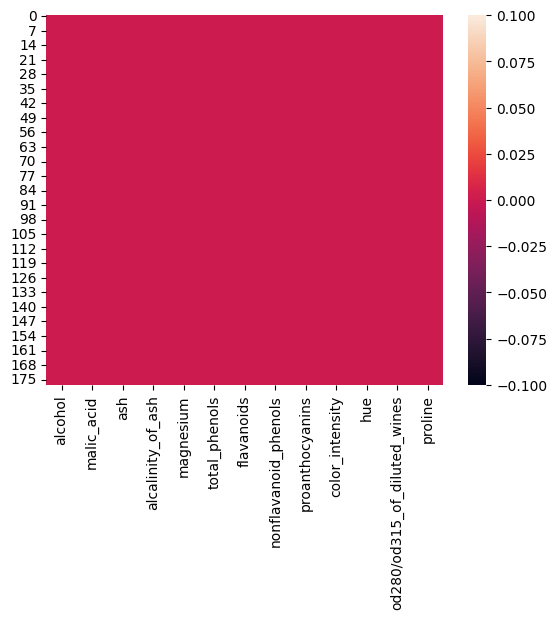

In [10]:
import seaborn as sns

sns.heatmap(df.isna(), annot=None, cbar=True)
plt.show()

KElbowVisualizer(ax=<AxesSubplot: >,
                 estimator=KMeans(n_clusters=9, random_state=1), k=(1, 10))

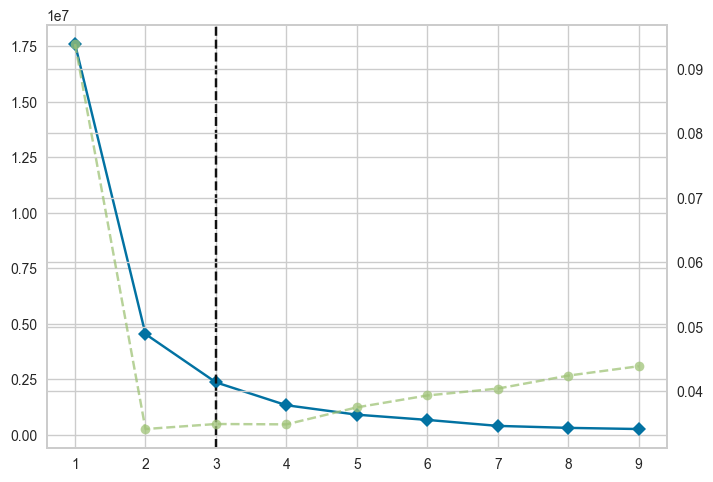

In [11]:
from yellowbrick.cluster import KElbowVisualizer, kelbow_visualizer
import warnings
warnings.filterwarnings('ignore')

visual = KElbowVisualizer(KMeans(random_state=1), k=(1, 10))
visual.fit(df)

In [12]:
model_K_means = KMeans(n_clusters=3, random_state=1)
model_K_means.fit(df)

KMeans(n_clusters=3, random_state=1)

In [13]:
labels = model_K_means.fit_predict(df)

In [14]:
labels

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1])

In [16]:
def transform(value):
    if value == 0:
        return 'red'
    elif value == 1:
        return 'yellow'
    elif value == 2:
        return 'blue'
    
vectors = np.vectorize(transform)
color_labels = vectors(labels)

In [60]:
# labels = labels.astype(object)
# labels[labels == 0] = 'red'
# labels[labels == 1] = 'yellow'
# labels[labels == 2] = 'blue'

In [85]:
# color_labels = np.array(['red' if label == 0 else 
#                          'yellow' if label == 1 else 
#                          'blue' for label in labels])

In [97]:
# mapping = {0: 'red', 1: 'yellow', 2: 'blue'}
# colors = np.vectorize(mapping.get)(labels)

In [18]:
# mapping = {0: 'red', 1: 'yellow', 2: 'blue'}

# colors = np.vectorize(mapping.get)(labels)

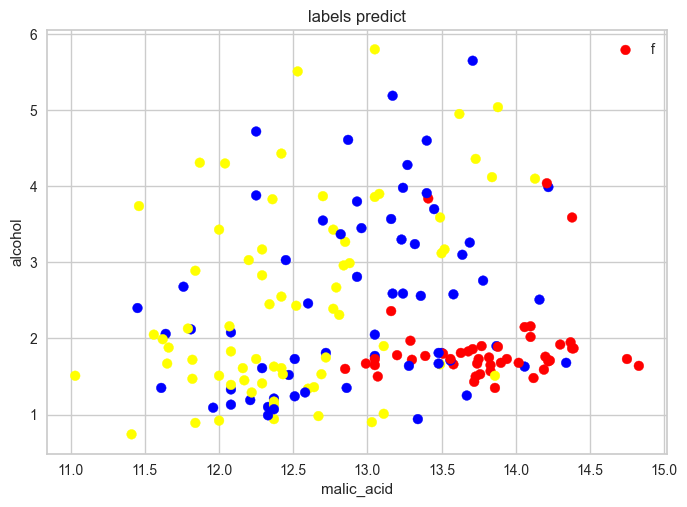

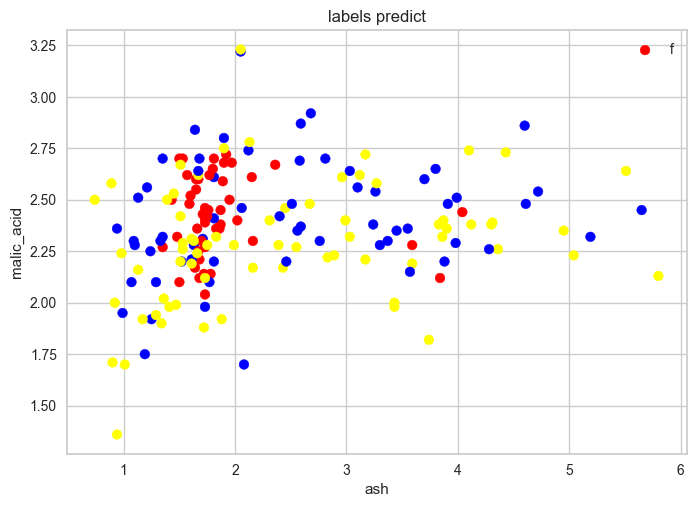

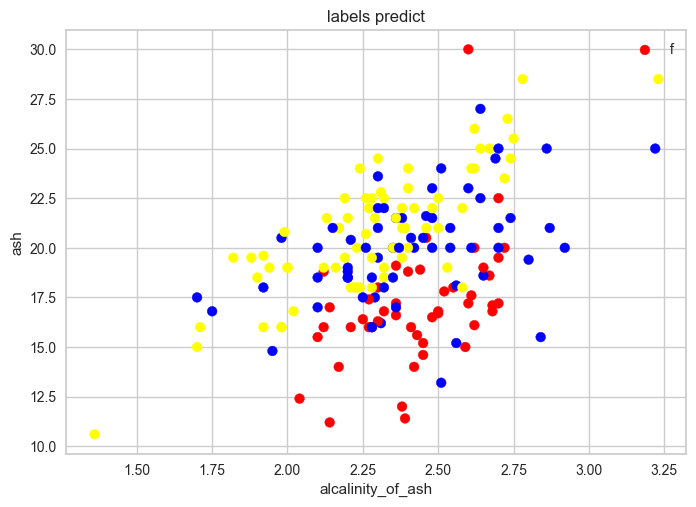

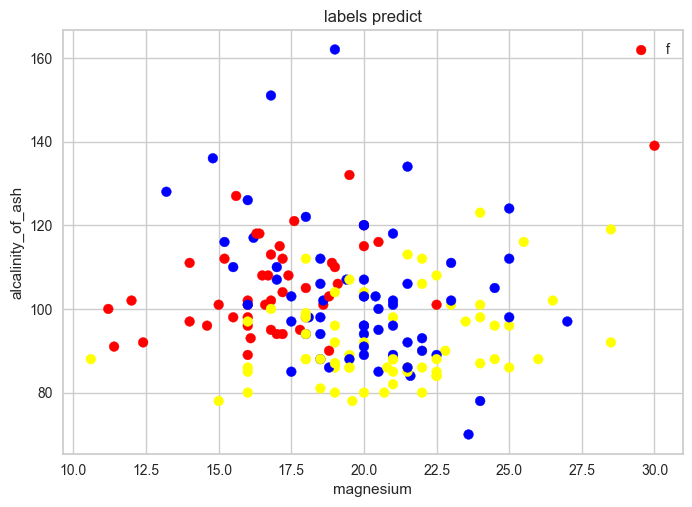

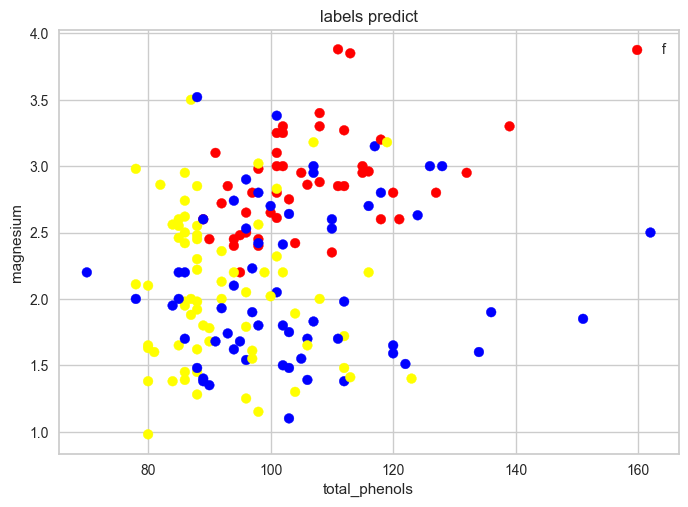

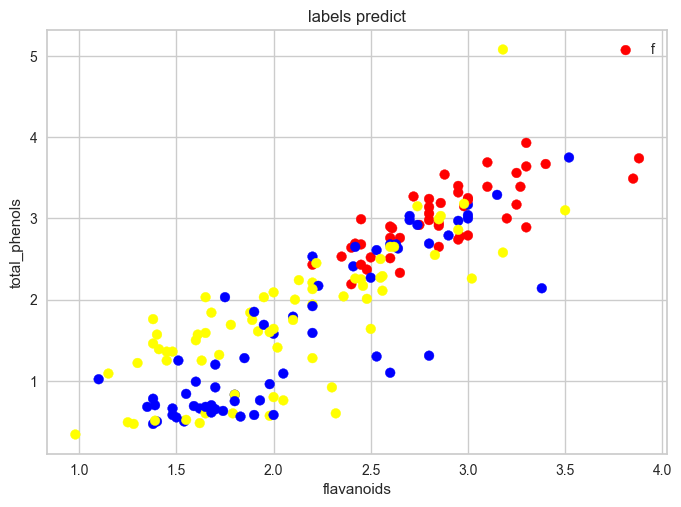

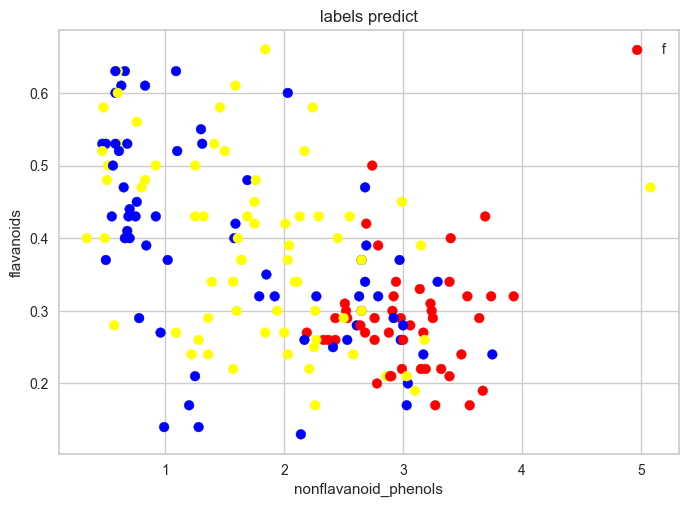

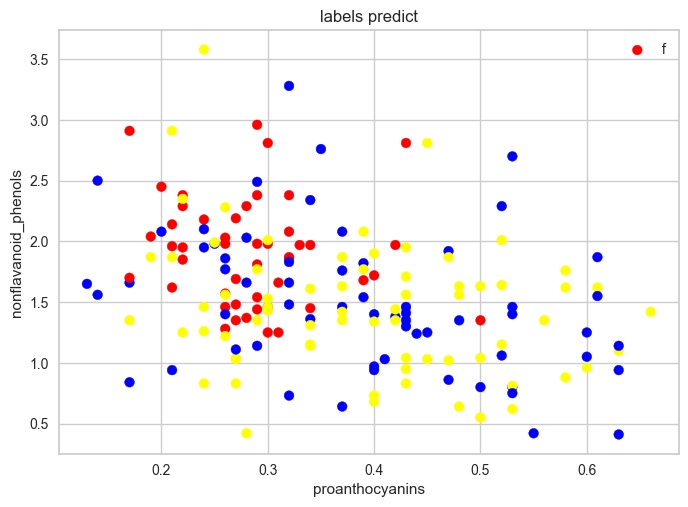

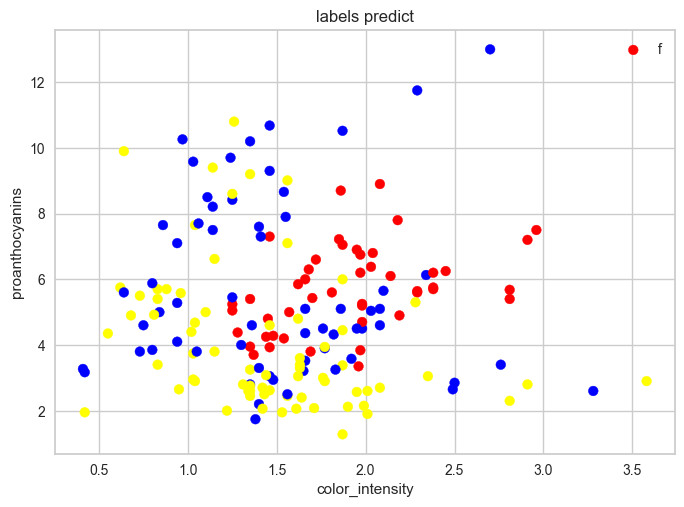

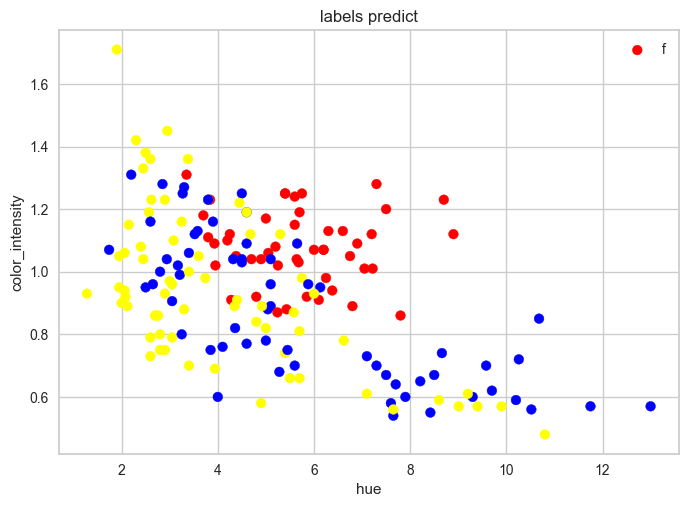

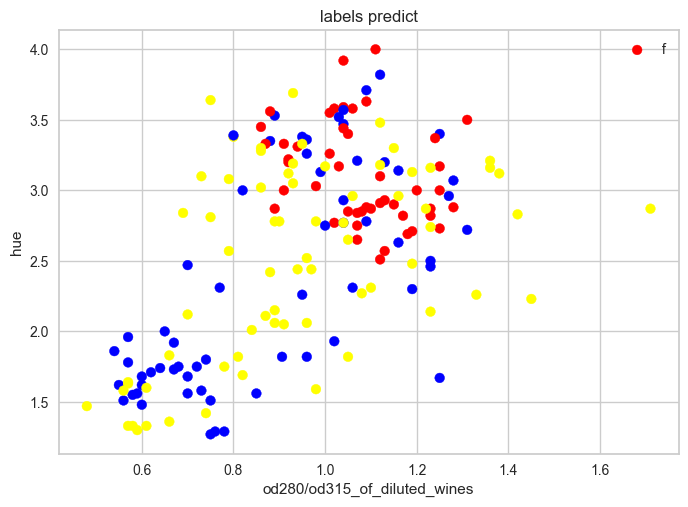

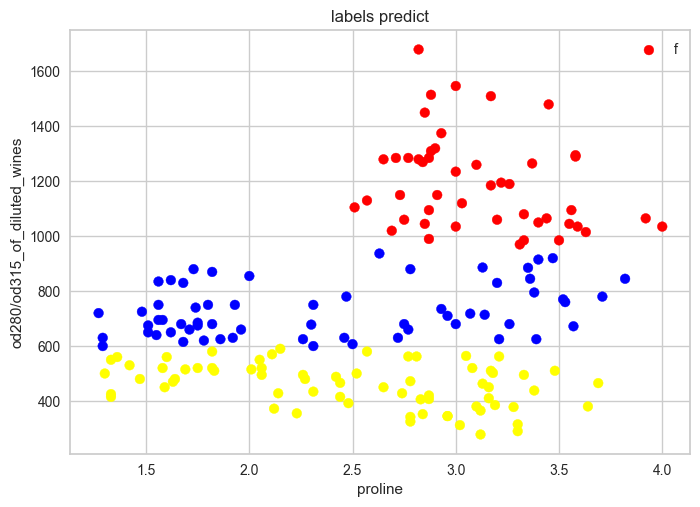

In [21]:
for i in range(df.shape[1] - 1):
    plt.scatter(df.iloc[::, i], df.iloc[::, i+1], c=color_labels)
    plt.legend(f'feature {i}')
    plt.title('labels predict')
    plt.xlabel(data.feature_names[i+1])
    plt.ylabel(data.feature_names[i])
    plt.show()
    if i == 12:
        break

In [22]:
print('accuracy', metrics.accuracy_score(data.target, labels))
################
print('silhouette', metrics.silhouette_score(df, labels))
print(f"Inertia: {model_K_means.inertia_:.2f}")
print('Bouldin index', metrics.davies_bouldin_score(df, labels))
print('Calinsky-Harabasz Index', metrics.calinski_harabasz_score(df, labels))

accuracy 0.702247191011236
silhouette 0.5711381937868838
Inertia: 2370689.69
Bouldin index 0.5342431775436286
Calinsky-Harabasz Index 561.815657860671


---------------------

In [99]:
df.shape

(178, 13)

In [104]:
min_sample = 100

for eps in np.arange(0.5, 11, 0.5):

    dbscan_test = DBSCAN(eps=eps, min_samples=min_sample) 
    labels_test = dbscan_test.fit_predict(df)
    n_clusters = len(set(labels_test)) - (1 if -1 in labels_test else 0)
    
    score = metrics.adjusted_rand_score(labels_test, target)
        
    n_noise = list(labels_test).count(-1)
    print(f"  eps = {eps} | score = {score:.2f} | min_samples = {min_sample}: Кластеров = {n_clusters}, Шумовых точек = {n_noise}")

  eps = 0.5 | score = 0.00 | min_samples = 100: Кластеров = 0, Шумовых точек = 178
  eps = 1.0 | score = 0.00 | min_samples = 100: Кластеров = 0, Шумовых точек = 178
  eps = 1.5 | score = 0.00 | min_samples = 100: Кластеров = 0, Шумовых точек = 178
  eps = 2.0 | score = 0.00 | min_samples = 100: Кластеров = 0, Шумовых точек = 178
  eps = 2.5 | score = 0.00 | min_samples = 100: Кластеров = 0, Шумовых точек = 178
  eps = 3.0 | score = 0.00 | min_samples = 100: Кластеров = 0, Шумовых точек = 178
  eps = 3.5 | score = 0.00 | min_samples = 100: Кластеров = 0, Шумовых точек = 178
  eps = 4.0 | score = 0.00 | min_samples = 100: Кластеров = 0, Шумовых точек = 178
  eps = 4.5 | score = 0.00 | min_samples = 100: Кластеров = 0, Шумовых точек = 178
  eps = 5.0 | score = 0.00 | min_samples = 100: Кластеров = 0, Шумовых точек = 178
  eps = 5.5 | score = 0.00 | min_samples = 100: Кластеров = 0, Шумовых точек = 178
  eps = 6.0 | score = 0.00 | min_samples = 100: Кластеров = 0, Шумовых точек = 178
  ep

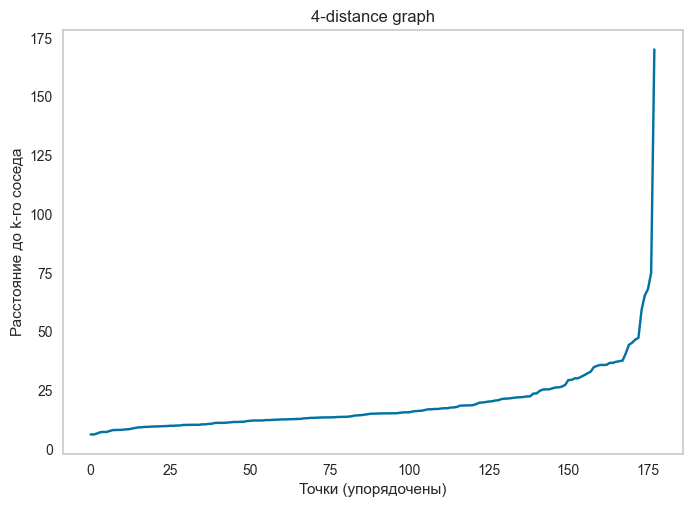

In [86]:
from sklearn.neighbors import NearestNeighbors


k = 4

neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(df)

distances, indices = neigh.kneighbors(df)

# Сортируем расстояния
distances = np.sort(distances[:, k-1], axis=0)

# Строим график
plt.plot(distances)
plt.title(f"{k}-distance graph")
plt.xlabel("Точки (упорядочены)")
plt.ylabel("Расстояние до k-го соседа")
plt.grid()
plt.show()

In [117]:
from sklearn.model_selection import ParameterGrid

param_grid = {
    'eps': np.linspace(0.1, 2.0, 15),  # диапазон eps
    'min_samples': range(3, 15)        # диапазон min_samples
}

best_score = -1
best_params = None

for params in ParameterGrid(param_grid):
    model = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])
    labels = model.fit_predict(df)
    

    if len(set(labels)) <= 1:
        continue
    

    score = silhouette_score(X, labels)
    if score > best_score:
        best_score = score
        best_params = params

print("Лучшие параметры:", best_params)
print("Лучший Silhouette Score:", best_score)


Лучшие параметры: None
Лучший Silhouette Score: -1


-----------

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(df)
pca_2d = pca.transform(df)

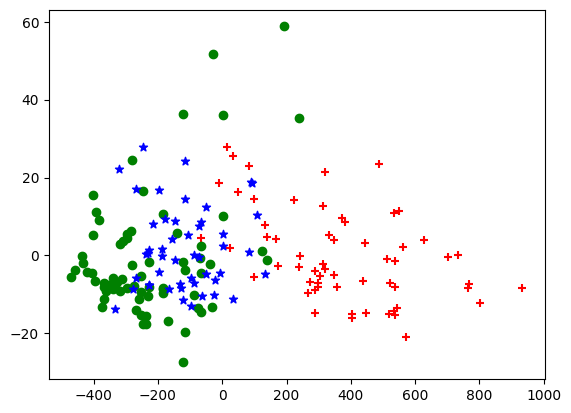

In [22]:
for i in range(0, pca_2d.shape[0]):
    if target[i] == 0:
        plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif target[i] == 1:
        plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif target[i] == 2:
        plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')



------------------------

In [11]:
##################### Иерархическая кластеризация 

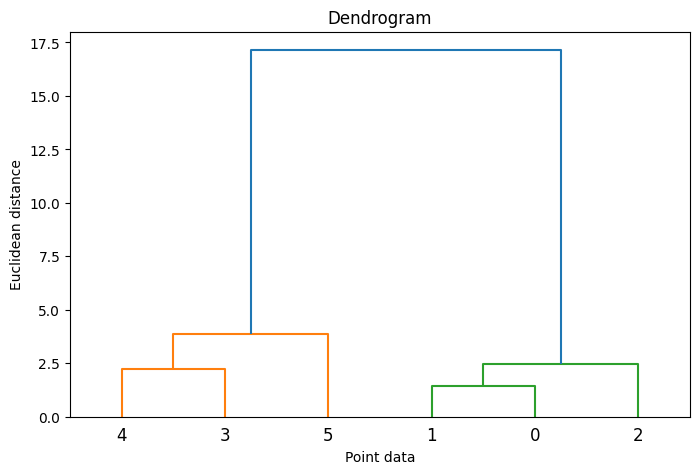

In [2]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs 
import pandas as pd

data = np.array([[1, 2],
                 [2, 3],
                 [3, 4],
                 [8, 8],
                 [9, 10],
                 [10, 12]])

linked = linkage(data, method='ward')

plt.figure(figsize=(8, 5))
dendrogram(linked,
           orientation='top',
          distance_sort='descending',
          show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Point data')
plt.ylabel('Euclidean distance')
plt.show()

In [3]:
clusters = fcluster(linked, t=6, criterion='distance')

print('clusters index: ')
for i, cluster in enumerate(clusters):
    print(f' index = {i} | point = {data[i]} | cluster = {cluster}')

clusters index: 
 index = 0 | point = [1 2] | cluster = 1
 index = 1 | point = [2 3] | cluster = 1
 index = 2 | point = [3 4] | cluster = 1
 index = 3 | point = [8 8] | cluster = 2
 index = 4 | point = [ 9 10] | cluster = 2
 index = 5 | point = [10 12] | cluster = 2


-----------

In [119]:
df = pd.read_csv('train.csv')

df_age = df['Age']

In [120]:
df_age.fillna(np.round(df_age.mean(), 1), inplace=True)

In [122]:
z = df_age.to_numpy()

In [124]:
z = np.sort(z).reshape(len(z), 1)

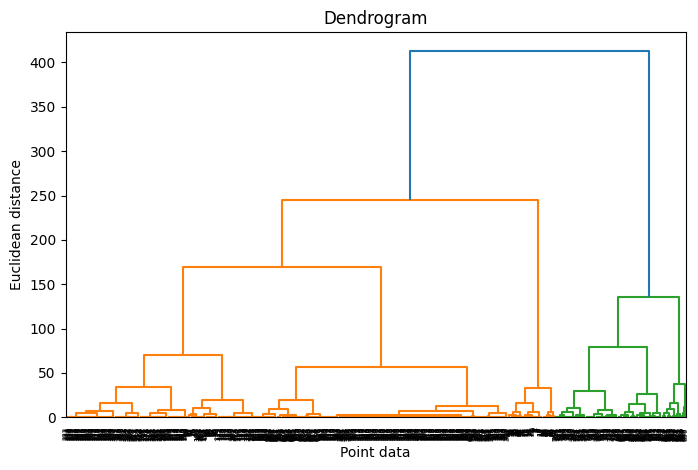

In [126]:
link = linkage(np.sort(z), method='ward')


plt.figure(figsize=(8, 5))
dendrogram(link,
           orientation='top',
          distance_sort='descending',
          show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Point data')
plt.ylabel('Euclidean distance')
plt.show()

-------

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, fcluster, linkage
from sklearn.datasets import make_classification

np.random.seed(1)
x, y = make_classification(n_samples=56, n_features=2,
                          n_informative=2, n_redundant=0, n_repeated=0, n_clusters_per_class=1, n_classes=3)

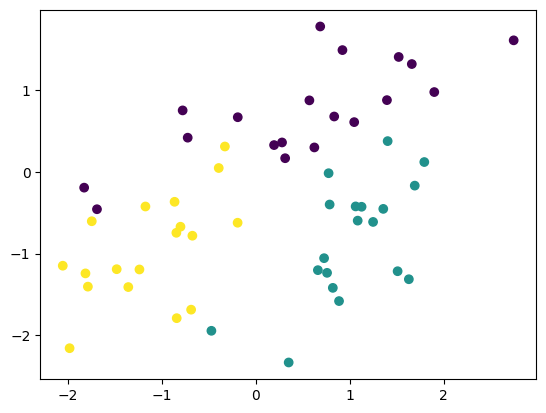

In [77]:
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.show()

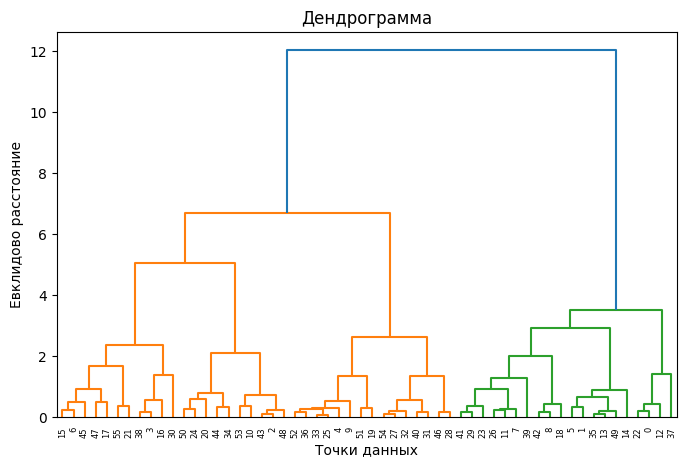

In [81]:
linked = linkage(x, method='ward')

plt.figure(figsize=(8, 5))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)

plt.title('Дендрограмма')
plt.xlabel('Точки данных')
plt.ylabel('Евклидово расстояние')
plt.show()

In [106]:
from scipy.cluster.hierarchy import fcluster

clusters_s = fcluster(linked, t=4, criterion='distance')

for i, cluster in enumerate(clusters_s):
    print(f'Index = {i} | point = {x[i]} | cluster = {cluster}')

Index = 0 | point = [-0.68819041 -1.68699765] | cluster = 1
Index = 1 | point = [-1.17469739 -0.42209678] | cluster = 1
Index = 2 | point = [0.27981109 0.36300969] | cluster = 3
Index = 3 | point = [1.52215548 1.41114313] | cluster = 4
Index = 4 | point = [ 1.35795991 -0.45140884] | cluster = 2
Index = 5 | point = [-0.864334   -0.36456561] | cluster = 1
Index = 6 | point = [0.8353711  0.68113474] | cluster = 4
Index = 7 | point = [-1.35720285 -1.40987266] | cluster = 1
Index = 8 | point = [-1.69069369 -0.45566254] | cluster = 1
Index = 9 | point = [ 0.78685521 -0.39782461] | cluster = 2
Index = 10 | point = [0.624058   0.30190141] | cluster = 3
Index = 11 | point = [-1.48068521 -1.19082861] | cluster = 1
Index = 12 | point = [-0.47220012 -1.94607476] | cluster = 1
Index = 13 | point = [-0.8453101  -0.74456285] | cluster = 1
Index = 14 | point = [-0.19311809 -0.6212142 ] | cluster = 1
Index = 15 | point = [1.04835477 0.61224335] | cluster = 4
Index = 16 | point = [1.90095971 0.98079789]

In [107]:
max(clusters_s)

4

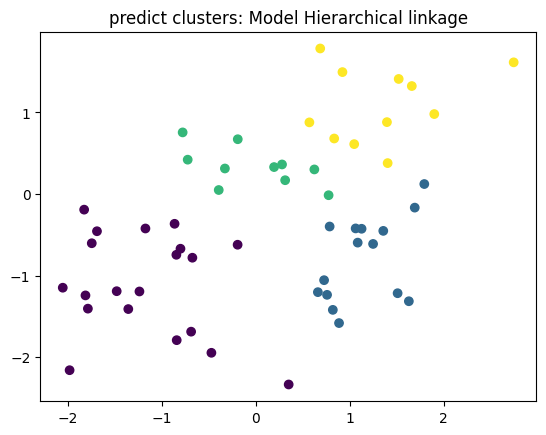

In [108]:
plt.scatter(x[:, 0], x[:, 1], c=clusters_s)
plt.title('predict clusters: Model Hierarchical linkage')
plt.show()